# Practice problems 2
## [Machine Learning](https://dis.unal.edu.co/~fgonza/)


### **Auxilary functions**


In [33]:
import numpy as np
import pylab as pl

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    """
    X: corresponde a las instancias de nuestro conjunto de datos
    pred_fun: es una función que para cada valor de X, me regresa una predicción
    """
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 60)
    y_vals = np.linspace(min_y, max_y, 60)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= -2, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

### **Classification with linear functions**

Given the following dataset:

/var/folders/db/1bk8jf_n3f12dwr84x4lyc0dnc5f92/T/ipykernel_5180/229797315.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,


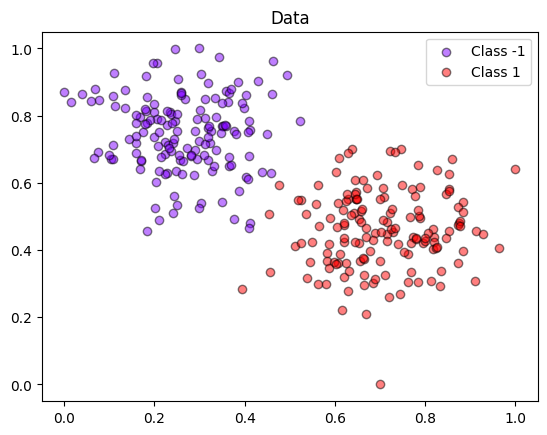

In [34]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

X, y = make_blobs(n_samples=300, n_features=2, centers=2, random_state=115)
X = minmax_scale(X)
y = 2 * y - 1 #convert labels to -1, 1
plot_data(X, y)
pl.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

We want to find a linear function $f(x) = wx+w_0$ with parameters $w \in \mathbb{R}^2$, $w_0 \in \mathbb{R}$. We formulate the problem as an optimization problem:

$$\min_{f\in H}L(f,D)$$

Where:
* $H$ is the hypothesis space defined as $H=\{f_{w, w_0}(x)=wx+w_0,\forall w\in\mathbb{R}^2 \ and \ w_0\in\mathbb{R}\}$.
* $L$ is the loss function defined as $ L(f, D) =\frac{1}{2}\sum_{(x^{(i)},y^{(i)})\in D} (f(x^{(i)}) - y^{(i)})^2 $.
* $(x^{(i)},y^{(i)})$ is a training sample where $y^{(i)}$ is the input and $y^{(i)}$ is the label.
* $D$ corresponds to the training dataset.

In [35]:
def f(w, x):
    """
     w: numpy array of shape (3,) w[1], w[2] coefficients of x, w[0] independent
        term
     x: numpy array of shape (2,)
    returns:
     a scalar y, with y<0 for class -1, y>=0 for class 1
    """
    a = np.dot(w[1:], x) + w[0]
    return a

In [36]:
def square_loss(w, x, y):
    '''
     Calculates the loss for a training sample.

     w: numpy array of shape (3,) w[1], w[2] coefficients of x, w[0] independent
        term
     x: numpy array of shape (2,)
     y: scalar
    '''
    return (y - f(w, x)) ** 2 / 2

def batch_loss(loss_fun, w, X, Y):
    '''
     Calculates the loss for a set of samples.

     loss_fun: a function that calculates the loss
     w: numpy array of shape (3,) w[1], w[2] coefficients of x, w[0] independent
        term
     X: numpy array of shape (n, 2) with n the number of samples.
     Y: numpy array of shape (n, ) with n the number of samples.
    '''
    assert(X.shape[0] == Y.shape[0])
    n = X.shape[0]
    tot_loss = 0
    for i in range(n):
        tot_loss += loss_fun(w, X[i], Y[i])
    return tot_loss

Input features: [0.41104796 0.48114158]
True label: -1
Predicted label: -0.33131511443825135
Training loss: 66.64996217168928
Test loss: 31.168429280278882


/var/folders/db/1bk8jf_n3f12dwr84x4lyc0dnc5f92/T/ipykernel_5180/229797315.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,


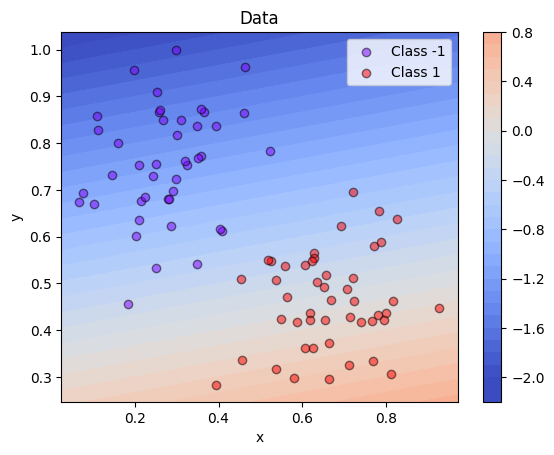

In [37]:
w = [1, .5, -3]
x = X_train[0]
label = y_train[0]

print('Input features: {}'.format(X[0]))
print('True label: {}'.format(y[0]))
print('Predicted label: {}'.format(f(w, x)))
print(f'Training loss: {batch_loss(square_loss, w, X_train, y_train)}')
print(f'Test loss: {batch_loss(square_loss, w, X_test, y_test)}')
plot_decision_region(X_test, lambda x_1, x_2: f(w, [x_1, x_2]))
plot_data(X_test, y_test)

We will use gradient descent to minimize the loss. To do so we need to calculate the gradient of the loss function with respect to the parameters.


$$
\begin{aligned} \frac{\partial L(f, D)}{\partial w} & =\frac{1}{2}\sum_{(x^{(i)},y^{(i)})\in D} \frac{\partial (f(x^{(i)}) - y^{(i)})^2}{\partial w}  
\end{aligned}
$$
with
$$
\begin{aligned}
\frac{\partial (f(x^{(i)}) - y^{(i)})^2}{\partial w} & =
\frac{\partial (w_1 x_1^{(i)} + w_2 x_2^{(i)} + w_0 - y^{(i)})^2}{\partial w} \\
& =(f_{w}(x^{(i)})-y^{(i)})\left[\begin{array}{c}
1 \\
x_1^{(i)}\\
x_2^{(i)}\\
\end{array}\right]
\end{aligned}
$$

Next, we define a function to calculate the gradient:

In [38]:
def dL_dw(w, x, y):
    '''
     Calculates the gradient of the loss function for one sample.
     w: numpy array of shape (3,) w[1], w[2] coefficients of x, w[0] independent
        term
     x: numpy array of shape (2,)
     y: scalar representing the label
    returns:
     a numpy array of shape (3,) with the gradients for each coefficient
    '''

    x_prime = np.zeros(len(x) + 1)
    x_prime[1:] = x
    x_prime[0] = 1
    return (f(w, x) - y) * x_prime

The following function implements gradient descent optimization

In [39]:
def batch_gd(X, Y, epochs, eta, w_ini):
    '''
    Gradient descent optimization
     X: numpy array of shape (n, 2) with n the number of samples.
     Y: numpy array of shape (n, ) with n the number of samples.
     epochs: number of iterations
     eta: learning rate
     w_ini: numpy array of shape (3,) with initial values for w
    Returns:
     w: final values of w
     lossess: list with loss values for each epoch
    '''
    losses = []
    w = w_ini
    n = X.shape[0] # número de ejemplos de entrenamiento
    for i in range(epochs):
        delta = np.zeros(len(w))
        for j in range(n):
            delta += dL_dw(w, X[j], Y[j]) # Vamos sumando el gradiente por cada ejemplo en el conjunto de datos
        w = w - eta * delta # Calculamos el nuevo valor de w
        losses.append(batch_loss(square_loss, w, X, Y)) # Vamos guardando el valor de pérdida para visualizar luego
    return w, losses

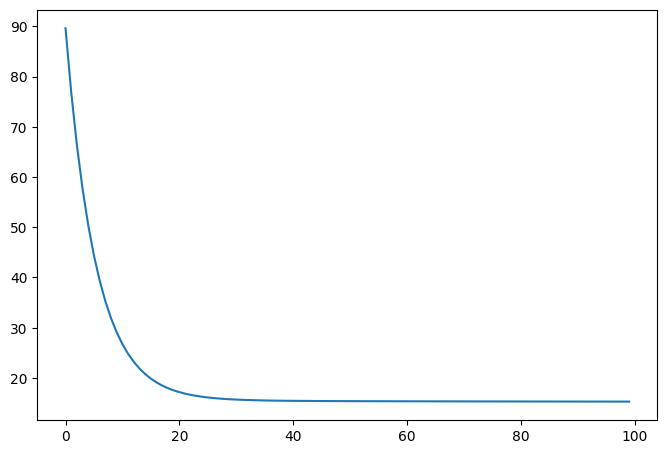

In [40]:
w, losses = batch_gd(X_train, y_train, 100, 0.005, np.array([0, 0, 0]))
pl.figure(figsize = (8,16/3))
pl.plot(losses)

Input features: [0.41104796 0.48114158]
True label: -1
Predicted label: 0.49532455930035985
Training loss: 15.288187187076392
Test loss: 7.189023193207342


/var/folders/db/1bk8jf_n3f12dwr84x4lyc0dnc5f92/T/ipykernel_5180/229797315.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,


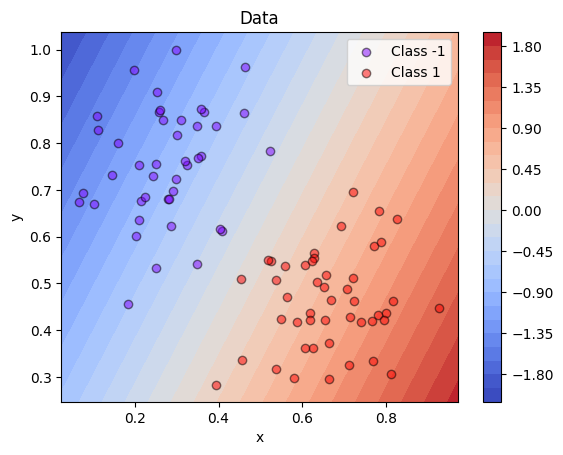

In [41]:
print('Input features: {}'.format(X[0]))
print('True label: {}'.format(y[0]))
print('Predicted label: {}'.format(f(w, x)))
print(f'Training loss: {batch_loss(square_loss, w, X_train, y_train)}')
print(f'Test loss: {batch_loss(square_loss, w, X_test, y_test)}')
plot_decision_region(X_test, lambda x_1, x_2: f(w, [x_1, x_2]))
plot_data(X_test, y_test)

## 1. Test error

Calculate the number (and percentage) of incorrectly classified test samples.

In [42]:
def test_error(w, X, Y):
    '''
     Calculates the number (and percentage) of incorrectly classified test samples.
     w: numpy array of shape (3,) w[1], w[2] coefficients of x, w[0] independent
        term
     X: numpy array of shape (n, 2) with n the number of samples.
     Y: numpy array of shape (n, ) with n the number of samples.
    Returns:
     error: number of incorrectly classified samples
     error_rate: percentage of incorrectly classified samples
    '''
    n = X.shape[0]
    error = 0
    for i in range(n):
        if f(w, X[i]) * Y[i] < 0:
            error += 1
    error_rate = error / n
    return error, error_rate

In [43]:
error, error_rate = test_error(w, X_test, y_test)
print(f'Number of incorrectly classified test samples: {error}')
print(f'Percentage of incorrectly classified test samples: {error_rate}')

Number of incorrectly classified test samples: 0
Percentage of incorrectly classified test samples: 0.0


## 2. Quadratic model

If we have a dataset like this one:

/var/folders/db/1bk8jf_n3f12dwr84x4lyc0dnc5f92/T/ipykernel_5180/229797315.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,


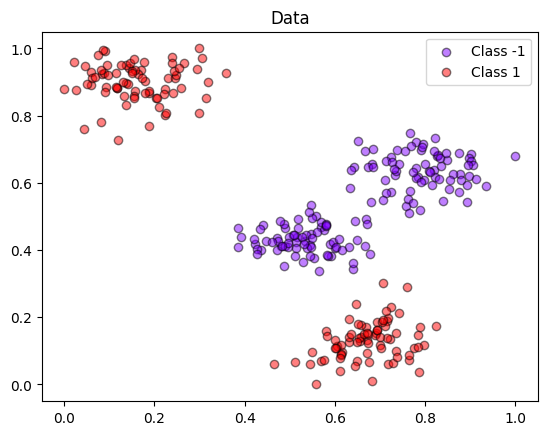

In [44]:
X, y = make_blobs(n_samples=300, n_features=2, centers=4, random_state=109)
X = minmax_scale(X)
y = 2 * (y % 2) - 1 #convert labels to -1, 1
plot_data(X, y)
pl.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

It would be very difficult to separate the two classes with a linear model.

/var/folders/db/1bk8jf_n3f12dwr84x4lyc0dnc5f92/T/ipykernel_5180/229797315.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,


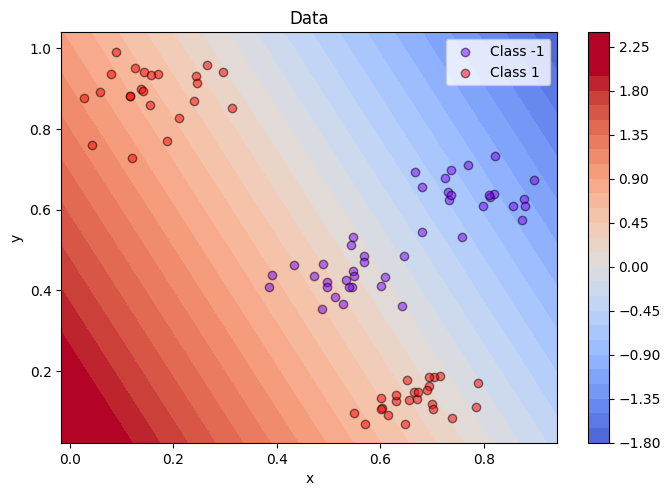

In [45]:
w, losses = batch_gd(X_train, y_train, 100, 0.006, np.array([0, 0, 0]))
pl.figure(figsize = (8,16/3))
plot_decision_region(X_test, lambda x_1, x_2: f(w, [x_1, x_2]))
plot_data(X_test, y_test)

Modify the previous code so that we learn a quadratic function of the form:

$$
f_w(x)=w_1 x_1^2 + w_2 x_2^2 + w_3 x_1 x_2 + w_4 x_1 + w_5 x_2 + w_0
$$

Evaluate it in the previous dataset and in the following one:

/var/folders/db/1bk8jf_n3f12dwr84x4lyc0dnc5f92/T/ipykernel_5180/229797315.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,


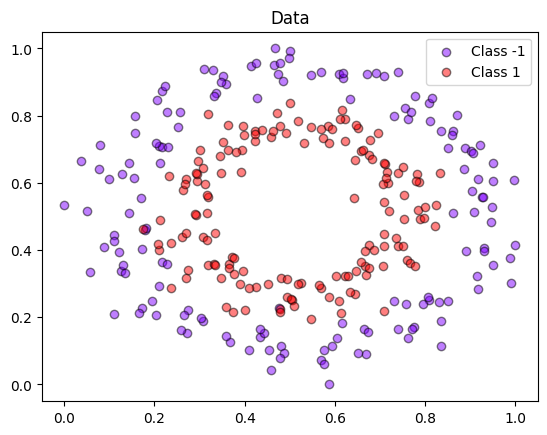

In [46]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=300, noise=0.1, factor=0.6, random_state=109)
X = minmax_scale(X)
y = 2 * (y % 2) - 1 #convert labels to -1, 1
plot_data(X, y)
pl.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [47]:
def f(w, x):
    """
    w: numpy array of shape (6,) w[1], w[2], w[3], w[4], w[5] coefficients of x, w[0] independent term
    x: numpy array of shape (2,)
    returns:
    a scalar y, with y<0 for class -1, y>=0 for class 1
    """
    a = w[1]*x[0]**2 + w[2]*x[1]**2 + w[3]*x[0]*x[1] + w[4]*x[0] + w[5]*x[1] + w[0]
    return a

def dL_dw(w, x, y):
    '''
    Calculates the gradient of the loss function for one sample.
    w: numpy array of shape (6,) w[1], w[2], w[3], w[4], w[5] coefficients of x, w[0] independent term
    x: numpy array of shape (2,)
    y: scalar representing the label
    returns:
    a numpy array of shape (6,) with the gradients for each coefficient
    '''
    x_prime = np.zeros(len(w))
    x_prime[1] = x[0]**2
    x_prime[2] = x[1]**2
    x_prime[3] = x[0]*x[1]
    x_prime[4] = x[0]
    x_prime[5] = x[1]
    x_prime[0] = 1
    return (f(w, x) - y) * x_prime

def batch_gd(X, Y, epochs, eta, w_ini):
    '''
    Gradient descent optimization
    X: numpy array of shape (n, 2) with n the number of samples.
    Y: numpy array of shape (n, ) with n the number of samples.
    epochs: number of iterations
    eta: learning rate
    w_ini: numpy array of shape (6,) with initial values for w
    Returns:
    w: final values of w
    losses: list with loss values for each epoch
    '''
    losses = []
    w = w_ini
    n = X.shape[0] # número de ejemplos de entrenamiento
    for i in range(epochs):
        delta = np.zeros(len(w))
        for j in range(n):
            delta += dL_dw(w, X[j], Y[j]) # Vamos sumando el gradiente por cada ejemplo en el conjunto de datos
        w = w - eta * delta # Calculamos el nuevo valor de w
        losses.append(batch_loss(square_loss, w, X, Y)) # Vamos guardando el valor de pérdida para visualizar luego
    return w, losses

# Ahora puedes usar estas funciones para entrenar tu modelo cuadrático
w, losses = batch_gd(X_train, y_train, 100, 0.006, np.array([0, 0, 0, 0, 0, 0]))

In [48]:
print(w, losses)

[7.41995606e+12 2.75245230e+12 2.70744030e+12 2.27838458e+12
 4.14544572e+12 4.07381808e+12] [104.8242006064196, 105.11536727026613, 106.20937024304665, 108.78187815741448, 114.1599999829992, 124.92745261588902, 146.09762916153295, 187.3859796967345, 267.61079108756644, 423.21509480424635, 724.7683534085688, 1308.9196237948445, 2440.269977331019, 4631.178750257651, 8873.749402949858, 17089.03331950643, 32996.84157573917, 63799.99711776742, 123445.6212340166, 238940.0960745808, 462576.98509268987, 895614.4559448498, 1734122.843668141, 3357761.1639785487, 6501678.709925915, 12589375.150065573, 24377231.161737394, 47202539.4792914, 91400118.49926056, 176981700.12492174, 342696819.9942389, 663577790.1237183, 1284912747.6188254, 2488029059.5335345, 4817672422.456025, 9328656227.130552, 18063458819.438328, 34977014626.64358, 67727425070.238174, 131143385406.85286, 253938305254.81805, 491711135003.33716, 952120398160.1083, 1843629700651.545, 3569895655813.4004, 6912535087194.242, 133850246446

## 3. Bounding the model output

A problem with the original linear model, and also with the quadratic one, is that its output is unbounded. Can you think of a way of bounding the output of the model such that it is in the range $[-1,1]$?

In [29]:
import numpy as np

def f(w, x):
    """
    w: numpy array of shape (6,) w[1], w[2], w[3], w[4], w[5] coefficients of x, w[0] independent term
    x: numpy array of shape (2,)
    returns:
    a scalar y, with y<0 for class -1, y>=0 for class 1
    """
    a = w[1]*x[0]**2 + w[2]*x[1]**2 + w[3]*x[0]*x[1] + w[4]*x[0] + w[5]*x[1] + w[0]
    return np.tanh(a)  # use tanh to bound the output to the range [-1, 1]

In [49]:
# Supongamos que tienes los siguientes parámetros del modelo
w = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

# Y tienes la siguiente entrada
x = np.array([0.7, 0.8])

# Ahora puedes evaluar la función en este ejemplo
output = f(w, x)

print(f'La salida del modelo para la entrada {x} es {output}')

La salida del modelo para la entrada [0.7 0.8] es 1.444
